HIV model

In [103]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [104]:
def make_system(gamma, tau, mu, beta, rho, alpha, delta, pi, sigma):
    """Make a system object for the SIR model.
    
    beta: contact rate in days
    gamma: recovery rate in days
    
    returns: System object
    """
    init = State(R=200, L=1, E=1, V=1)

    t0 = 0
    t_end = 50

    return System(init=init, t0=t0, t_end=t_end,
                  gamma=gamma, tau=tau, mu=mu, 
                  beta=beta, rho=rho, alpha=alpha, 
                  delta=delta, pi=pi, sigma=sigma)

In [105]:
'''def update_func(state, t, system):
    """Update the SIR model.
    
    state: State (R, L, E, V)
    t: time
    system: System object
    
    returns: State
    """
    r, l, e, v = state
    
    cells_in = system.gamma*system.tau
    regular_cell_death = system.mu*r
    latent_infection=system.beta*system.rho*r*v
    active_infection=system.beta*(1-system.rho)*r*v
    latent_death=system.mu*l
    activation_of_latent=system.alpha*l
    active_death=system.delta*e
    virion_in=system.pi*e
    virion_out=system.sigma*v
    
    r += cells_in - regular_cell_death - latent_infection - active_infection
    l += latent_infection - latent_death - activation_of_latent
    e += active_infection + activation_of_latent - active_death
    v += virion_in - virion_out
    
    return State(R=r, L=l, E=e, V=v)'''
def update_func(state,t,system):
    R,L,E,V=state
    deltaE = (1-rho)*beta*R*V + alpha*L - delta*E
    deltaV = pi*E - sigma*V
    deltaR = gamma*tau - mu*R - beta*R*V
    deltaL = rho*beta*R*V - mu*L - alpha*L
    
    R += deltaR
    L += deltaL
    E += deltaE
    V += deltaV
    
    return R, L, E, V

In [106]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame


In [107]:
system = make_system(1.36, .2, 1.36e-3, .00027, .1, 3.6e-2, .33, 100, 2)
run_simulation(system, update_func)

,R,L,E,V
0,200,1,1,1
1,199.946,0.96804,0.7546,99
2,194.602,1.46633,5.35053,-23.54
3,195.846,1.28786,2.52448,558.593
4,166.314,4.1935,28.3215,-306.145
5,180.107,2.66209,6.75374,3138.3
6,27.5223,17.8238,141.972,-2462.92
7,46.0588,15.3277,79.2908,16660.1
8,-160.914,35.4733,240.141,-8730.99
9,-539.758,72.0815,503.573,32745.1


In [108]:
def plot_results(R, L, E, V):
    plot(R)
    plot(L)
    plot(E)
    plot(V)

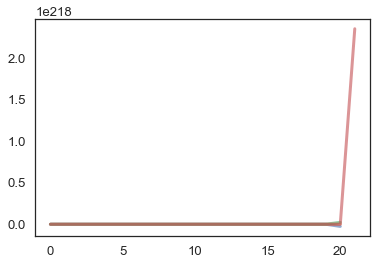

In [109]:
# frame[system.t0] = system.init
# frame.row[system.t0] = system.init
results = run_simulation(system, update_func)
plot_results(results.R, results.L, results.E, results.V)